# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [10]:
data.iloc[1:5,11:30]

,workinschool,email,computerskills,specialskills,firstname,sex,race,h,l,call,city,kind,adid,fracblack,fracwhite,lmedhhinc,fracdropout,fraccolp,linc
1,1,1,1,0,Kristen,f,w,1.0,0.0,0.0,c,a,384.0,0.080736,0.888374,10.408828,0.233687,0.087285,9.532859
2,1,0,1,0,Lakisha,f,b,0.0,1.0,0.0,c,a,384.0,0.104301,0.837370,10.466754,0.101335,0.591695,10.540329
3,0,1,1,1,Latonya,f,b,1.0,0.0,0.0,c,a,384.0,0.336165,0.637370,10.431908,0.108848,0.406576,10.412141
4,1,1,1,0,Carrie,f,w,1.0,0.0,0.0,c,a,385.0,0.397595,0.180196,9.876219,0.312873,0.030847,8.728264


In [20]:
data.groupby(["race", "call"]).size()
# it seems that there is indeed a higher proportion of white that got called back
# there are equal sample sizes for black and white people

race  call
b     0.0     2278
      1.0      157
w     0.0     2200
      1.0      235
dtype: int64

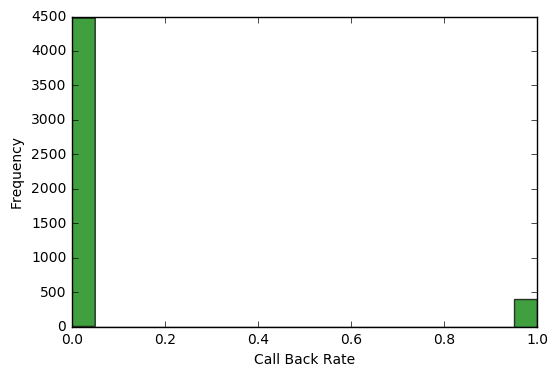

In [12]:
plt.hist(data.call, 20,  facecolor='green', alpha=0.75)

plt.xlabel('Call Back Rate')
plt.ylabel('Frequency')

plt.show()

### 1. What test is appropriate for this problem? Does CLT apply?
CLT does apply in that the sample size is large enough, so a two-sample z-test could be appropriate.
However, there are multiple potential factors to CLT that interact with each other.
It is best to use a logistic regression so that we could hold other factors relatively constant.
### 2. What are the null and alternate hypotheses?
Null hypothesis: The probability of a white and a black getting a call back is the same.
Alternate hypothesis: The probability difference between a white and a black person getting called back is not zero.

### 3. Compute margin of error, confidence interval, and p-value.

In [3]:
w = data[data.race=='w']
b = data[data.race=='b']

n_w = len(w)
n_b = len(b)

prop_w = np.sum(w.call) / len(w)
prop_b = np.sum(b.call) / len(b)

prop_diff = prop_w - prop_b
phat = (np.sum(w.call) + np.sum(b.call)) / (len(w) + len(b))

z = prop_diff / np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
pval = stats.norm.cdf(-z) * 2
print("Z score: {}".format(z))
print("P-value: {}".format(pval))

Z score: 4.108412152434346
P-value: 3.983886837585077e-05


Since the p-value is significantly smaller than 0.01, we reject the null hypothesis that white and black sounding names have the same callback rate.

In [4]:
moe = 1.96 * np.sqrt(phat * (1 - phat) * ((1 / n_w) + (1 / n_b)))
ci = prop_diff + np.array([-1, 1]) * moe
print("Margin of Error: {}".format(moe))
print("Confidence interval: {}".format(ci))

Margin of Error: 0.015281912310894095
Confidence interval: [ 0.01675094  0.04731477]


### 4.Write a story describing the statistical significance in the context or the original problem.
There is significantly higher probability of a white candidate being called back than a black candidate.

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?
The importance of race may have not been as significant if other factors were considered.
For instance, there is likely a positive correlation between being white and getting a higher level of education or more work experiences.
I would change this analysis to a logistic regression to account for all other potential factors.
Before logistic regression, I would first apply a chi-squared distribution with 1 degree of freedom. 

In [22]:
obs_array = [[2278, 2200],
            [157, 235]]
exp_array = [[2239, 2239],
            [196,196]]
stats.chisquare(obs_array, exp_array)
# the p-value is smaller than 0.05 so that we reject the null hypothesis

Power_divergenceResult(statistic=array([ 8.43952521,  8.43952521]), pvalue=array([ 0.00367152,  0.00367152]))

In [7]:
cont_table = pd.crosstab(index=data.call, columns=data.race)
cont_table

race,b,w
call,,
0.0,2278,2200
1.0,157,235


In [8]:
chi2, pval, _, _ = stats.chi2_contingency(cont_table)
print("Chi-squared test statistic: {}".format(chi2))
print("p-value: {}".format(pval))

Chi-squared test statistic: 16.44902858418937
p-value: 4.997578389963255e-05


Still reject the hypothesis that the black and white race had the same call rate.
In other words, the call rate is different by race.